# Lab 8: PageRank

In this assignment, we will learn how to compute the importance score of nodes in a graph by using the PageRank method.

## Generate a graph

Here, we use [NetworkX](https://networkx.org/) to generate a directed graph. Then, we will apply PageRank method to this graph. 

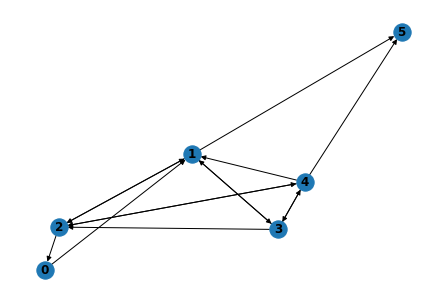

#nodes: 6, #edges: 14
node-0, #in_degrees 1, #out_degrees 1
node-1, #in_degrees 4, #out_degrees 3
node-2, #in_degrees 3, #out_degrees 3
node-3, #in_degrees 2, #out_degrees 3
node-4, #in_degrees 2, #out_degrees 4
node-5, #in_degrees 2, #out_degrees 0
[[0 1 0 0 0 0]
 [0 0 1 1 0 1]
 [1 1 0 0 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 0 0]]


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# generate a directed graph from the given adjacency matrix
A = np.array([[0, 1, 0, 0, 0, 0],
             [0, 0, 1, 1, 0, 1],
             [1, 1, 0, 0, 1, 0],
             [0, 1, 1, 0, 1, 0],
             [0, 1, 1, 1, 0, 1],
             [0, 0, 0, 0, 0, 0]])

G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

print('#nodes: {}, #edges: {}'.format(G.number_of_nodes(), G.number_of_edges()))

# output the in_degrees and out_degrees of each node
for idx in range(G.number_of_nodes()):
    print('node-{}, #in_degrees {}, #out_degrees {}'.format(idx, G.in_degree(idx), G.out_degree(idx)))

# get the adjacency matrix of graph G
Adj = nx.adjacency_matrix(G).todense()
print(Adj)

## Task 1. Build the transition matrix from the adjacency matrix

In [3]:
# your code to get the transition matrix M
M = Adj/Adj.sum(axis=0)
print(M)

[[0.         0.25       0.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.5        0.         0.5       ]
 [1.         0.25       0.         0.         0.5        0.        ]
 [0.         0.25       0.33333333 0.         0.5        0.        ]
 [0.         0.25       0.33333333 0.5        0.         0.5       ]
 [0.         0.         0.         0.         0.         0.        ]]


## Task 2. Use the power iteration method to compute the importance score of nodes


* Initialization: initialize the importance score vector $r_{0}=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$.
* Iterate: $r_{t+1} =  M r_{t}$
* Stop when $\|r_{t+1} - r_{t}\|_1\leq \epsilon$


In [7]:
# your code
r0 = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]]).T
r1 = M * r0
r2 = M * r1
r3 = M * r2
r4 = M * r3
print(r4)

[[0.0546875 ]
 [0.19704861]
 [0.234375  ]
 [0.26215278]
 [0.25173611]
 [0.        ]]


## Task 3. In the given graph, are there any dead ends?

If there are some dead ends in the given graph, please use the Random Teleports method to re-compute the importance score. In particular, please construct a new transition matrix as follows,

$$G = \beta M + (1-\beta)[\frac{1}{6}]_{6\times 6}$$

Here, $0<\beta<1$. Apply the power iteration method to $G$. Compare the obtained importance score with that obtained in Task 2. 

In [9]:
# your code
B = .9

random_teleport_M = B*M + (1-B)*np.full((6, 6), 1/6)
print(random_teleport_M)
r0 = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]]).T
r1 = random_teleport_M*r0
r2 = random_teleport_M*r1
r3 = random_teleport_M*r2
r4 = random_teleport_M*r3
print(r4)

[[0.01666667 0.24166667 0.01666667 0.01666667 0.01666667 0.01666667]
 [0.01666667 0.01666667 0.31666667 0.46666667 0.01666667 0.46666667]
 [0.91666667 0.24166667 0.01666667 0.01666667 0.46666667 0.01666667]
 [0.01666667 0.24166667 0.31666667 0.01666667 0.46666667 0.01666667]
 [0.01666667 0.24166667 0.31666667 0.46666667 0.01666667 0.46666667]
 [0.01666667 0.01666667 0.01666667 0.01666667 0.01666667 0.01666667]]
[[0.06421432]
 [0.19708464]
 [0.23157917]
 [0.24582292]
 [0.24463229]
 [0.01666667]]


In [1]:
print("Node 5 was a dead end. To compare the obtained importance score with that obtained in Task 2 it was not that dissimilar and the values were very close. Node 5 was 0 in task2 and here it is 0.01666667. In task 3 the scores are less than task 2 scores by a very small amount. ")

Node 5 was a dead end. To compare the obtained importance score with that obtained in Task 2 it was not that dissimilar and the values were very close. Node 5 was 0 in task2 and here it is 0.01666667. In task 3 the scores are less than task 2 scores by a very small amount. 
